# Proyecto Final

## Regresión Lineal univariable

## [Link Video](https://drive.google.com/file/d/1herZulk3bDsj6PRVPStjiQ5Wj1mU4htt/view?usp=sharing)

### 1. Cargar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 2. Cargar Información

In [2]:
data = pd.DataFrame(np.load('proyecto_training_data.npy'))
data=data.set_axis(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis=1)
rowCount = data.shape[0]

#### 2.1 Dividiendo datos para entrenamiento y para validación

In [3]:
trainingDataPercentage = 0.8

IsTrainingData = np.random.choice([0,1], p=[1-trainingDataPercentage, trainingDataPercentage], size=(rowCount))

while(np.sum(IsTrainingData) == np.ceil(rowCount*trainingDataPercentage)):
    IsTrainingData = np.random.choice([0,1], p=[1-trainingDataPercentage, trainingDataPercentage], size=(rowCount))
    
data['training']=IsTrainingData

trainingData = data.loc[data['training'] == 1]
validationData = data.loc[data['training'] == 0]

### 3. Análisis Exploratorio

In [4]:
stats = pd.DataFrame({
    'Variable':pd.Series(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']),
    'Media':pd.Series([np.nanmean(trainingData['SalePrice']), np.nanmean(trainingData['OverallQual']), np.nanmean(trainingData['1stFlrSF']), np.nanmean(trainingData['TotRmsAbvGrd']), np.nanmean(trainingData['YearBuilt']), np.nanmean(trainingData['LotFrontage'])]),
    'Valor Máximo':pd.Series([np.nanmax(trainingData['SalePrice']), np.nanmax(trainingData['OverallQual']), np.nanmax(trainingData['1stFlrSF']), np.nanmax(trainingData['TotRmsAbvGrd']), np.nanmax(trainingData['YearBuilt']), np.nanmax(trainingData['LotFrontage'])]),
    'Valor Mínimo':pd.Series([np.nanmin(trainingData['SalePrice']), np.nanmin(trainingData['OverallQual']), np.nanmin(trainingData['1stFlrSF']), np.nanmin(trainingData['TotRmsAbvGrd']), np.nanmin(trainingData['YearBuilt']), np.nanmin(trainingData['LotFrontage'])]),
    'Rango':pd.Series([np.ptp(trainingData['SalePrice']), np.ptp(trainingData['OverallQual']), np.ptp(trainingData['1stFlrSF']), np.ptp(trainingData['TotRmsAbvGrd']), np.ptp(trainingData['YearBuilt']), np.nanmax(trainingData['LotFrontage'])-np.nanmin(trainingData['LotFrontage']) ]),
    'Desviación Estándar':pd.Series([np.nanstd(trainingData['SalePrice']), np.nanstd(trainingData['OverallQual']), np.nanstd(trainingData['1stFlrSF']), np.nanstd(trainingData['TotRmsAbvGrd']), np.nanstd(trainingData['YearBuilt']), np.nanstd(trainingData['LotFrontage'])]),
})
stats

,Variable,Media,Valor Máximo,Valor Mínimo,Rango,Desviación Estándar
0,SalePrice,181395.386712,755000.0,35311.0,719689.0,79587.134683
1,OverallQual,6.101363,10.0,1.0,9.0,1.380362
2,1stFlrSF,1166.365417,4692.0,334.0,4358.0,391.751684
3,TotRmsAbvGrd,6.510221,14.0,2.0,12.0,1.644613
4,YearBuilt,1971.693356,2010.0,1875.0,135.0,29.541263
5,LotFrontage,70.354102,313.0,21.0,292.0,24.785063


### 4. Histogramas

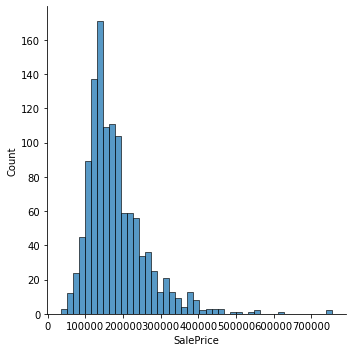

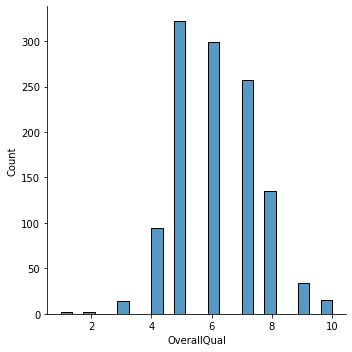

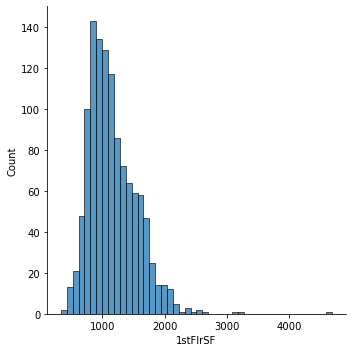

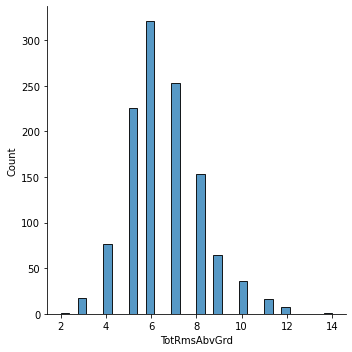

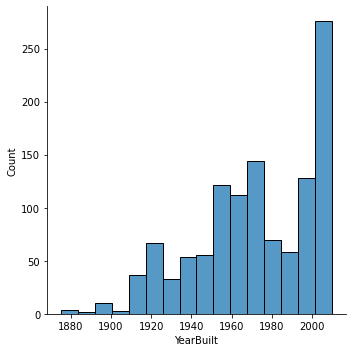

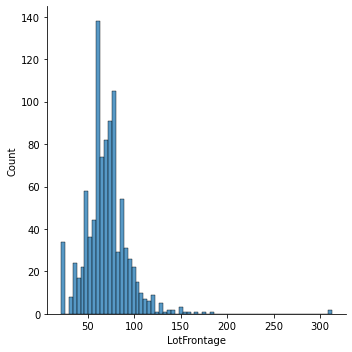

In [5]:
sns.displot(trainingData['SalePrice'])
sns.displot(trainingData['OverallQual'])
sns.displot(trainingData['1stFlrSF'])
sns.displot(trainingData['TotRmsAbvGrd'])
sns.displot(trainingData['YearBuilt'])
sns.displot(trainingData['LotFrontage'])

### 5. Correlaciones

#### Overall Quality

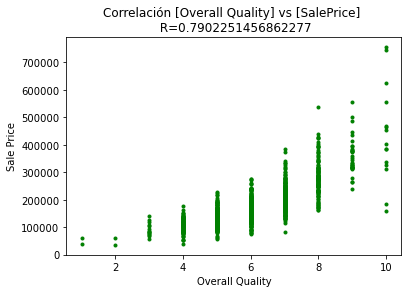

In [6]:
R_OverallQual = np.corrcoef(trainingData['SalePrice'], trainingData['OverallQual'])[0,1]
plt.scatter(trainingData['OverallQual'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Overall Quality] vs [SalePrice] \n R={R_OverallQual}')
plt.show()

#### First Floor Area

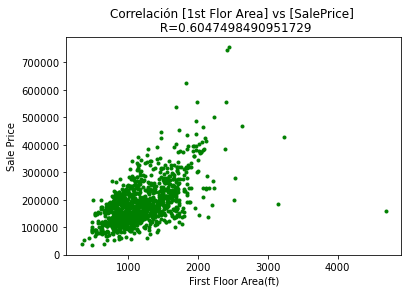

In [7]:
R_1stFlrSF = np.corrcoef(trainingData['SalePrice'], trainingData['1stFlrSF'])[0,1]
plt.scatter(trainingData['1stFlrSF'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('First Floor Area(ft)')
plt.ylabel('Sale Price')
plt.title(f'Correlación [1st Flor Area] vs [SalePrice] \n R={R_1stFlrSF}')
plt.show()

#### Total Rooms above grade

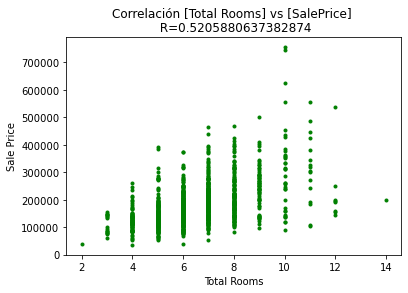

In [8]:
R_TotRmsAbvGrd = np.corrcoef(trainingData['SalePrice'], trainingData['TotRmsAbvGrd'])[0,1]
plt.scatter(trainingData['TotRmsAbvGrd'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('Total Rooms')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Total Rooms] vs [SalePrice] \n R={R_TotRmsAbvGrd}')
plt.show()

#### Original construction date

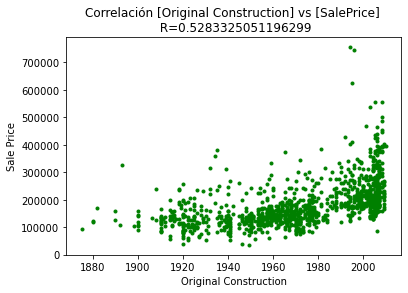

In [9]:
R_YearBuilt = np.corrcoef(trainingData['SalePrice'], trainingData['YearBuilt'])[0,1]
plt.scatter(trainingData['YearBuilt'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('Original Construction')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Original Construction] vs [SalePrice] \n R={R_YearBuilt}')
plt.show()

#### Linear feet of street connected to property

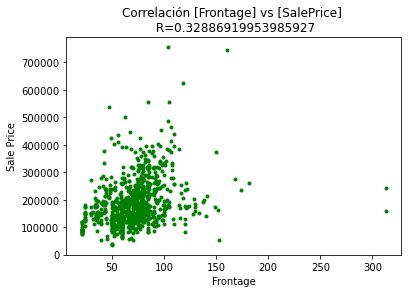

In [10]:
FrontageData = trainingData.loc[:,('SalePrice', 'LotFrontage')]
FrontageData.dropna(inplace=True)
R_LotFrontage = np.corrcoef(FrontageData['SalePrice'], FrontageData['LotFrontage'])[0,1]
plt.scatter(FrontageData['LotFrontage'], FrontageData['SalePrice'], color='g', marker='.')
plt.xlabel('Frontage')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Frontage] vs [SalePrice] \n R={R_LotFrontage}')
plt.show()

#### Comparación Correlaciones

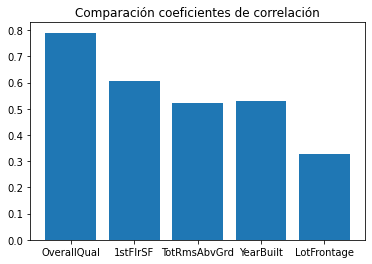

In [11]:
labels = np.array(['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
values = np.array([
    np.corrcoef(trainingData['SalePrice'], trainingData['OverallQual'])[0,1],
    np.corrcoef(trainingData['SalePrice'], trainingData['1stFlrSF'])[0,1],
    np.corrcoef(trainingData['SalePrice'], trainingData['TotRmsAbvGrd'])[0,1],
    np.corrcoef(trainingData['SalePrice'], trainingData['YearBuilt'])[0,1],
    np.corrcoef(FrontageData['SalePrice'], FrontageData['LotFrontage'])[0,1]
])

plt.bar(labels, values)
plt.title('Comparación coeficientes de correlación')
plt.show()

### 6. Desarrollo de funciones

Consdierando la redacción del proyecto, la clase se desarrolla con métodos estáticos para ser llamados de forma individual  
sin necesidad de instanciar la clase

In [108]:
class myGradeDescend:
    @staticmethod    
    def calculateModels(x, y, epochs, periodoError, learningRate):
        #define return structures
        models, err = [], []

        #define operational variables
        currentError, currentGradients = 0, 0

        #format data for matricial operations
        betas, x, y = np.array([[1], [1]]), np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)
        m = np.hstack([x, np.ones_like(x)])

        for i in range(epochs+1):                                     #iterating based on epochs
            ydif = np.matmul(m, betas)-y                              #calculating difference between predicted 'y' and 'y'
            currentError = np.nanmean((ydif)**2)                      #calculating error
            err.append(currentError)                                  #adding it to a list        
            currentGradients = (m*ydif).mean(axis=0).reshape(-1, 1)   #gradient vector
            betas = betas-(currentGradients*learningRate)             #update betas
            models.append(betas.reshape(1,-1))                        #store model
            if(i % periodoError == 0):
                print(f'iteración: {i}, Error: {currentError}  Model found: B0:{betas[1]}, B1:{betas[0]}')
                        
        return models, err
    
    @staticmethod
    def graphErrorEvolution(err): 
        err = np.array(err).reshape(-1)    
        x = np.linspace(0, err.size, err.size)    
        plt.plot(x, err)
        plt.title('Error Evolution')
        plt.ylabel('Squared difference')
        plt.xlabel('Iterations')
        plt.show()
    
    @staticmethod
    def graphModelEvolution(x, models, n):
        xFirst, xLast = np.nanmin(x), np.nanmax(x)
        models = np.array(models)
        plt.title('Model Evolution')
        plt.xlabel('Independent Variable')
        plt.ylabel('Predictions')
        for i in range(0, models.shape[0]-1, n):        
            independent = np.array([xFirst, xLast])
            dependent = np.array([
                np.dot(models[i], np.array([xFirst, 1]))[0],
                np.dot(models[i], np.array([xLast, 1]))[0],
            ])                
            plt.plot(independent, dependent)
        plt.show()
    
    @staticmethod
    def EvaluateModel(xToValidate, yToValidate, manualModel, sciKitModel):
        xToValidate, yToValidate = np.array(xToValidate).reshape(-1, 1), np.array(yToValidate).reshape(-1, 1)
        xToValidate = np.hstack([xToValidate, np.ones_like(xToValidate)])
        manualValidation = np.matmul(xToValidate, manualModel)
        scikitValidation = np.matmul(xToValidate, sciKitModel)
        averageValidation = (manualValidation+scikitValidation)/2 
        
        manualError = np.mean((manualValidation-yToValidate)**2)
        scikitError = np.mean((scikitValidation-yToValidate)**2)
        averageError = np.mean((averageValidation-yToValidate)**2)
        
        xLabels = np.array(['Manual', 'Scikit', 'Average'])
        barList = plt.bar(xLabels, np.array([manualError, scikitError, averageError]))
        barList[0].set_color('r')
        barList[1].set_color('g')
        barList[2].set_color('b')
        plt.title('Comparación Errores Modelos \n manual, scikit y promedio')
        plt.show()
                      
        return manualValidation, scikitValidation, averageValidation

        
        

### 7. Utilzando la clase desarrollada

#### 7.1 Usando clase con OverallQual

iteración: 0, Error: 39235648444.21891  Model found: B0:[8979.72012479], B1:[59080.59708305]
iteración: 2000, Error: 2378779497.3912373  Model found: B0:[-95685.48033923], B1:[45420.02213849]
iteración: 4000, Error: 2378739150.8280334  Model found: B0:[-96585.47945079], B1:[45560.51829886]
iteración: 6000, Error: 2378739147.566069  Model found: B0:[-96593.57187067], B1:[45561.78158225]
iteración: 8000, Error: 2378739147.565805  Model found: B0:[-96593.64463437], B1:[45561.79294117]
iteración: 10000, Error: 2378739147.5658054  Model found: B0:[-96593.64528863], B1:[45561.7930433]


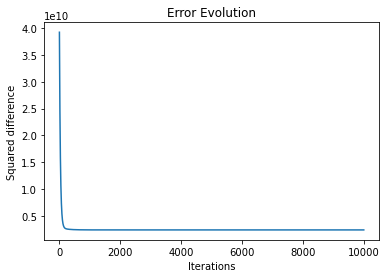

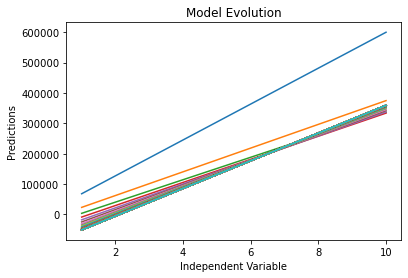

In [19]:
OverallQualModels, OverallQualErrors = myGradeDescend.calculateModels(trainingData['OverallQual'], trainingData['SalePrice'], 10000, 2000, 0.04950)
myGradeDescend.graphErrorEvolution(OverallQualErrors)
myGradeDescend.graphModelEvolution(trainingData['OverallQual'], OverallQualModels, 100)

#### 7.2 Usando clase con TotRmsAbvGrd (Total rooms above grade)

iteración: 0, Error: 39235537468.05537  Model found: B0:[7619.29081261], B1:[52459.51734412]
iteración: 2000, Error: 4617492628.001094  Model found: B0:[17289.93645236], B1:[25206.48761459]
iteración: 4000, Error: 4617492073.91887  Model found: B0:[17385.1224363], B1:[25192.72576741]
iteración: 6000, Error: 4617492073.890626  Model found: B0:[17385.80202364], B1:[25192.62751369]
iteración: 8000, Error: 4617492073.890624  Model found: B0:[17385.80687561], B1:[25192.6268122]
iteración: 10000, Error: 4617492073.890625  Model found: B0:[17385.80691025], B1:[25192.62680719]


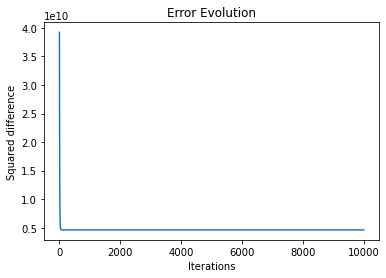

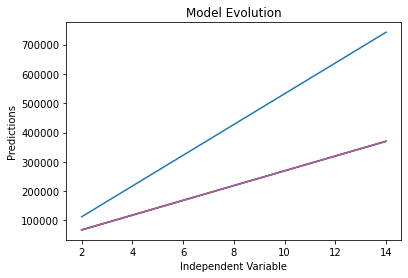

In [28]:
TotalRoomsModels, TotalRoomsErrors = myGradeDescend.calculateModels(trainingData['TotRmsAbvGrd'], trainingData['SalePrice'], 10000, 2000, 0.042)
myGradeDescend.graphErrorEvolution(TotalRoomsErrors)
myGradeDescend.graphModelEvolution(trainingData['TotRmsAbvGrd'], TotalRoomsModels, 2000)

### 8. Modelos con scikit

#### 8.1 Scikit-Learn  Overall Qual

In [104]:
OverallQual_Model = LinearRegression()
OverallQual_Model.fit(np.array(trainingData['OverallQual']).reshape(-1, 1), np.array(trainingData['SalePrice']).reshape(-1, 1))
OverallQual_Model.get_params()
print(f'Scikit-Learn Model B0:{OverallQual_Model.intercept_} B1:{OverallQual_Model.coef_}')

Scikit-Learn Model B0:[-96593.64529456] B1:[[45561.79304423]]


#### 8.2 Scikit-Learn TotRmsAbvGrd

In [105]:
FirstFloor_Model = LinearRegression()
FirstFloor_Model.fit(np.array(trainingData['TotRmsAbvGrd']).reshape(-1, 1), np.array(trainingData['SalePrice']).reshape(-1, 1))
FirstFloor_Model.get_params()
print(f'Scikit-Learn Model B0:{FirstFloor_Model.intercept_} B1:{FirstFloor_Model.coef_}')

Scikit-Learn Model B0:[17385.8069105] B1:[[25192.62680715]]


### 9. Utilzando función de comparación

#### 9.1 Aplicando comparación con Overall Quality

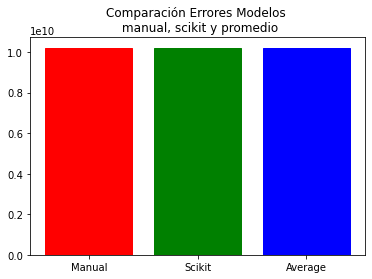

In [109]:
OmVal, OsciVal, OavgVal = myGradeDescend.EvaluateModel(validationData['OverallQual'], validationData['SalePrice'], OverallQualModels[-1][0], np.array([OverallQual_Model.coef_[0][0],OverallQual_Model.intercept_[0]]))

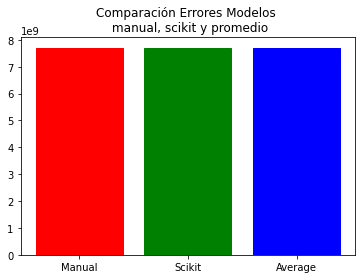

In [110]:
TmVal, TsciVal, TavgVal = myGradeDescend.EvaluateModel(validationData['TotRmsAbvGrd'], validationData['SalePrice'], TotalRoomsModels[-1][0], np.array([FirstFloor_Model.coef_[0][0],FirstFloor_Model.intercept_[0]]))